### Music Genre Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets\Music_genre_dataset.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [2]:
print(df.columns)
print("------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------")
print(df.shape)

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')
------------------------------------------------------
filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10     

In [3]:
def detail_info(data):
    temp_df = pd.DataFrame(index= data.columns)
    
    temp_df['data_type'] = data.dtypes
    temp_df['unique_val'] = data.nunique()
    temp_df['duplicate_val'] = data.duplicated().sum()
    temp_df['missing_val'] = data.isnull().sum()
    temp_df['missing_val_%'] = round(data.isnull().mean()*100,2)
    
    return temp_df

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
filename,object,1000,0,0,0.0
tempo,float64,35,0,0,0.0
beats,int64,81,0,0,0.0
chroma_stft,float64,986,0,0,0.0
rmse,float64,986,0,0,0.0
spectral_centroid,float64,986,0,0,0.0
spectral_bandwidth,float64,986,0,0,0.0
rolloff,float64,986,0,0,0.0
zero_crossing_rate,float64,985,0,0,0.0
mfcc1,float64,986,0,0,0.0


In [4]:
# "filename" feature is string type and unique to reach row, which is irrelevant for the model

df.drop(["filename"], axis=1, inplace=True)

In [5]:
# Output feature classes are balanced:

df.label.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [6]:
# Encoding the output feature

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [7]:
output_dict = feature_encoding(df, 'label')
display(output_dict)

directory = "Music_Genre"

if not os.path.exists(directory):
    os.makedirs(directory)
    
file_path = os.path.join(directory, "output_dict.pkl")
with open(file_path, "wb") as file:
    pickle.dump(output_dict, file)

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [8]:
df["label"] = df["label"].map(output_dict)
df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


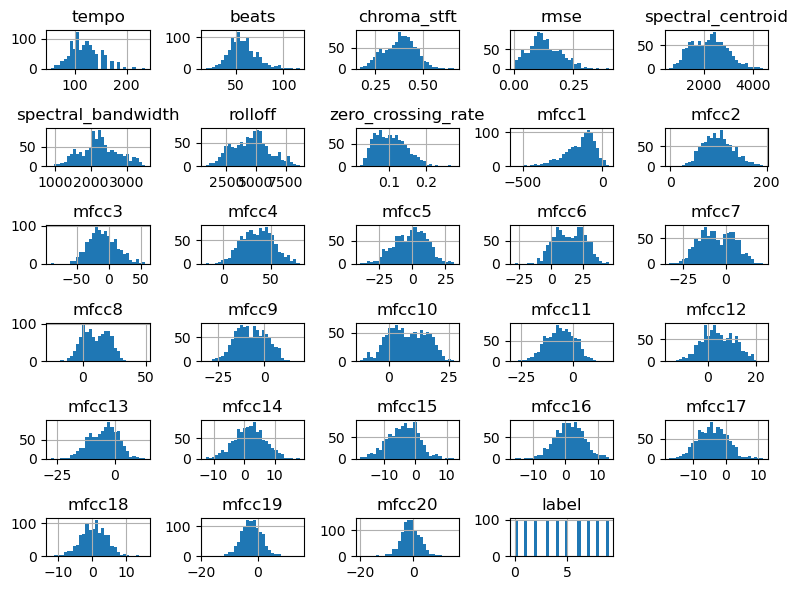

In [9]:
df.hist(figsize=(8,6), bins=30)
plt.tight_layout() 
plt.show()

In [10]:
X = df.drop("label", axis=1)
y = df["label"]

#### Although this is a classification problem however as per the problem statement let's try with unsupervised technique

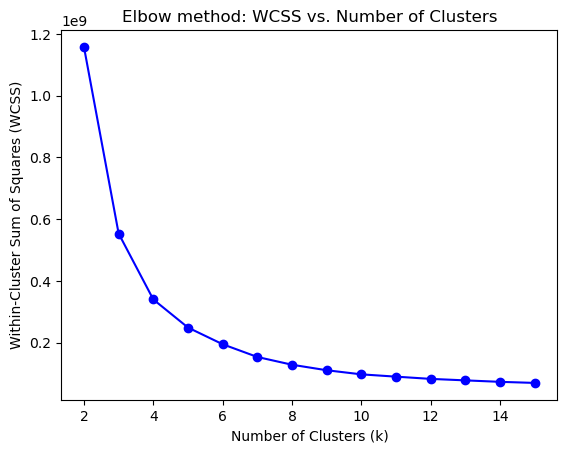

Silhouette Score: 0.38725834848743595


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
k_values = range(2, 16) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS curve
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow method: WCSS vs. Number of Clusters')
plt.show()

# k_values looks good between 8 to 12, Let's consider n=10 as per the 
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X), 
y_pred = kmeans.labels_

silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")


#### Let's try with RandomForest classification

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average="weighted")
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred, average="weighted")
print(f"Recall: {recall}")

f1_Score = f1_score(y_test, y_pred, average="weighted")
print(f"f1_Score: {f1_Score}")

Accuracy: 0.6
Precision: 0.5966234948009617
Recall: 0.6
f1_Score: 0.5891146852240319


In [13]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  3,  1,  0,  1,  3,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0, 14,  0,  3,  4,  0,  1,  1,  2],
       [ 0,  0,  0, 10,  2,  0,  0,  3,  3,  3],
       [ 1,  0,  0,  1,  9,  0,  0,  0,  3,  1],
       [ 1,  3,  3,  0,  1, 13,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  1,  0, 23,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 11,  1,  0],
       [ 1,  1,  3,  0,  6,  2,  0,  0,  9,  1],
       [ 1,  0,  4,  1,  1,  0,  5,  1,  2,  6]], dtype=int64)